<a href="https://colab.research.google.com/github/foziaShareen/100-Days-Of-ML-Code/blob/master/Copy_of_mine_catdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:06<00:00, 255MB/s]
100% 1.06G/1.06G [00:06<00:00, 172MB/s]


In [ ]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
directory='/content/train',
labels ='inferred',
label_mode='int',
batch_size=32,
image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
directory='/content/test',
labels ='inferred',
label_mode='int',
batch_size=32,
image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
from keras.src.engine.data_adapter import train_validation_split
from tensorflow.python import train
#problem is this all data is stored in numpy array from 0 to 255 but we have to change it as 0 to 1 , actually we have to nomalize it
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image , label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)



In [ ]:
from tensorflow.python.ops.gen_nn_ops import conv2d
#create CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 63s 81ms/step - loss: 0.6353 - accuracy: 0.6402 - val_loss: 0.5436 - val_accuracy: 0.7194
Epoch 2/10
625/625 [==============================] - 50s 80ms/step - loss: 0.4777 - accuracy: 0.7685 - val_loss: 0.4953 - val_accuracy: 0.7770
Epoch 3/10
625/625 [==============================] - 50s 80ms/step - loss: 0.3526 - accuracy: 0.8400 - val_loss: 0.5556 - val_accuracy: 0.7840
Epoch 4/10
625/625 [==============================] - 50s 80ms/step - loss: 0.2033 - accuracy: 0.9171 - val_loss: 0.7352 - val_accuracy: 0.7752
Epoch 5/10
625/625 [==============================] - 50s 79ms/step - loss: 0.1029 - accuracy: 0.9614 - val_loss: 1.0954 - val_accuracy: 0.7708
Epoch 6/10
625/625 [==============================] - 50s 79ms/step - loss: 0.0683 - accuracy: 0.9767 - val_loss: 1.0201 - val_accuracy: 0.7648
Epoch 7/10
625/625 [==============================] - 51s 80ms/step - loss: 0.0488 - accuracy: 0.9837 - val_loss: 1.2586 - val_accuracy:

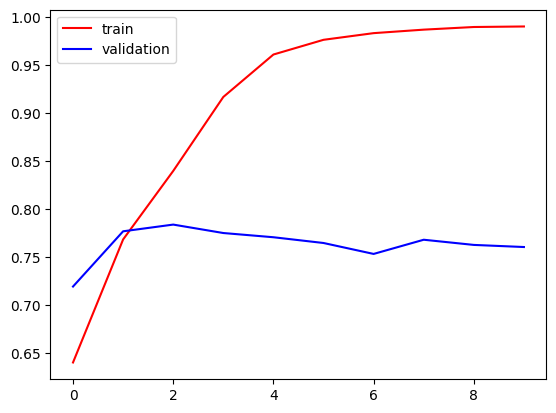

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import cv2


In [ ]:
test_img = plt.imread('')

UnidentifiedImageError: ignored

TypeError: ignored

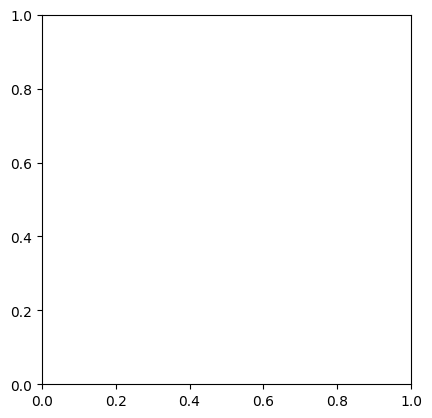

In [ ]:
plt.imshow(test_img)